In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Importing datasets

In [2]:
df_trts = pd.read_csv('train_time_series.csv')

In [200]:
df_trts.head(20)

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
5,20591,1565109931288,2019-08-06T16:45:31.288,unknown,-0.010880,-0.967575,0.170898
6,20592,1565109931388,2019-08-06T16:45:31.388,unknown,0.052841,-0.982330,0.235565
7,20593,1565109931488,2019-08-06T16:45:31.488,unknown,0.032974,-1.053207,0.256714
8,20594,1565109931589,2019-08-06T16:45:31.589,unknown,-0.090424,-0.972794,0.356308
9,20595,1565109931689,2019-08-06T16:45:31.689,unknown,0.124268,-0.890533,0.223221


In [3]:
df_trl = pd.read_csv('train_labels.csv')

In [201]:
df_trl.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


# Merging Datasets based on timestamp

In [4]:
df = pd.merge(df_trl,df_trts, on=['timestamp'])

In [202]:
df.head(20)

,timestamp,label,x,y,z
0,1565109931087,1,-0.053802,-0.987701,0.068985
1,1565109932090,1,0.013718,-0.852371,-0.000870
2,1565109933092,1,0.145584,-1.007843,-0.036819
3,1565109934094,1,-0.099380,-1.209686,0.304489
4,1565109935097,1,0.082794,-1.001434,-0.025375
5,1565109936099,1,0.037582,-0.998383,0.019333
6,1565109937101,1,-0.020554,-0.999741,0.120789
7,1565109938103,1,0.032440,-0.970337,0.241425
8,1565109939106,1,0.212524,-0.976364,0.074997
9,1565109940108,2,0.154510,-0.843460,0.010544


# Keeping only useful columns

In [6]:
df = df[['timestamp','label','x','y','z']]

In [7]:
df.shape

(375, 5)

In [8]:
df.isnull().sum()

timestamp    0
label        0
x            0
y            0
z            0
dtype: int64

In [9]:
#merge dataframe
df3 = pd.merge(df_trts,df_trl, on=['timestamp'], how = 'left')

In [203]:
df3.head(20)

,timestamp,x,y,z,label,acceleration
3,1565109931087,-0.053802,-0.987701,0.068985,1.0,0.991568
4,1565109931188,-0.054031,-1.003616,0.126450,1.0,1.012993
5,1565109931288,-0.010880,-0.967575,0.170898,1.0,0.982612
6,1565109931388,0.052841,-0.982330,0.235565,1.0,1.011561
7,1565109931488,0.032974,-1.053207,0.256714,1.0,1.084544
8,1565109931589,-0.090424,-0.972794,0.356308,1.0,1.039932
9,1565109931689,0.124268,-0.890533,0.223221,1.0,0.926455
10,1565109931789,-0.031784,-0.893982,0.264236,1.0,0.932757
11,1565109931889,-0.097427,-0.902725,0.137680,1.0,0.918347
12,1565109931989,-0.094864,-1.197876,0.128494,1.0,1.208477


In [10]:
#filling label gaps
df3['label']=df3['label'].where(df3['label'].notnull(), other=(df3['label'].fillna(method='ffill')+df3['label'].fillna(method='bfill'))/2)

In [11]:
#keeping useful columns and deleting rows with uncertain label 
df3 = df3[['timestamp','x','y','z','label']]
df3.label = df3['label'].replace([1.5,2.5,3.5],np.nan)
df3 = df3.dropna()
#calculating acceleration to independize from accelerometer orientation
df3['acceleration'] = (df3.x**2 + df3.y**2 + df3.z**2)**0.5

In [12]:
df3l1 = df3.loc[5:75]
df3l1.head()

,timestamp,x,y,z,label,acceleration
5,1565109931288,-0.010880,-0.967575,0.170898,1.0,0.982612
6,1565109931388,0.052841,-0.982330,0.235565,1.0,1.011561
7,1565109931488,0.032974,-1.053207,0.256714,1.0,1.084544
8,1565109931589,-0.090424,-0.972794,0.356308,1.0,1.039932
9,1565109931689,0.124268,-0.890533,0.223221,1.0,0.926455


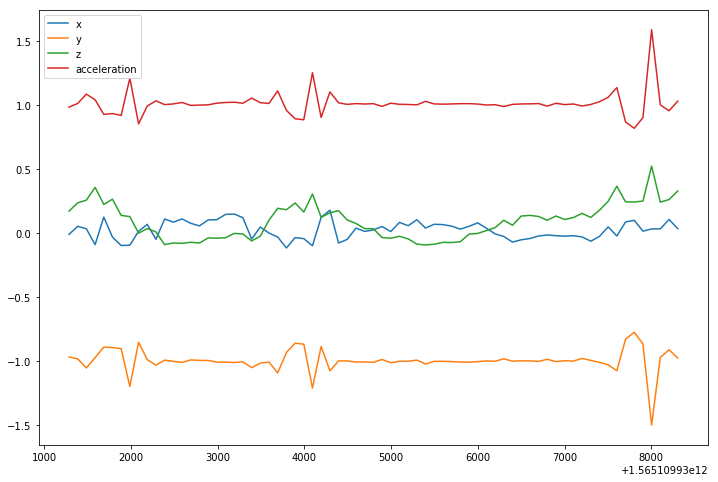

In [13]:
#plotting label1 sample to see pattern
plt.figure(figsize=(12,8))
plt.plot(df3l1.timestamp,df3l1.x)
plt.plot(df3l1.timestamp,df3l1.y)
plt.plot(df3l1.timestamp,df3l1.z)
plt.plot(df3l1.timestamp,df3l1.acceleration)
plt.legend()
plt.show()

In [14]:
df3.head()

,timestamp,x,y,z,label,acceleration
3,1565109931087,-0.053802,-0.987701,0.068985,1.0,0.991568
4,1565109931188,-0.054031,-1.003616,0.126450,1.0,1.012993
5,1565109931288,-0.010880,-0.967575,0.170898,1.0,0.982612
6,1565109931388,0.052841,-0.982330,0.235565,1.0,1.011561
7,1565109931488,0.032974,-1.053207,0.256714,1.0,1.084544


In [15]:
df3l2 = df3.loc[85:155]
df3l2.tail()

,timestamp,x,y,z,label,acceleration
151,1565109945921,0.990189,-1.346603,-0.018295,2.0,1.671571
152,1565109946022,-0.043243,-0.893326,-0.149338,2.0,0.906754
153,1565109946122,0.083878,-0.950729,-0.048096,2.0,0.955633
154,1565109946222,0.535095,-1.015015,0.163803,2.0,1.159057
155,1565109946322,-0.114365,-1.242584,0.291733,2.0,1.281485


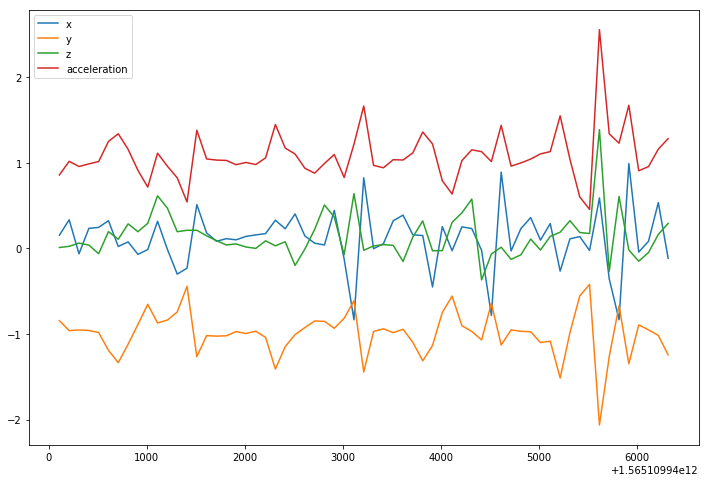

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df3l2.timestamp,df3l2.x)
plt.plot(df3l2.timestamp,df3l2.y)
plt.plot(df3l2.timestamp,df3l2.z)
plt.plot(df3l2.timestamp,df3l2.acceleration)
plt.legend()
plt.show()

In [17]:
df3l3 = df3.loc[1582:1652]
df3l3.tail(10)

,timestamp,x,y,z,label,acceleration
1643,1565110095556,0.660507,-1.447128,-0.050140,3.0,1.591529
1644,1565110095656,-0.065506,-0.916504,-0.087997,3.0,0.923046
1645,1565110095757,-0.009079,-0.939835,0.102600,3.0,0.945462
1646,1565110095857,0.394699,-0.968445,-0.106644,3.0,1.051212
1647,1565110095957,0.081100,-1.137604,0.224625,3.0,1.162401
1648,1565110096057,0.484192,-1.096329,0.321594,3.0,1.240887
1649,1565110096158,-0.597107,-1.384003,-0.214615,3.0,1.522518
1650,1565110096258,0.126816,-0.877090,0.094376,3.0,0.891222
1651,1565110096358,-0.079254,-0.415359,0.129166,3.0,0.442141
1652,1565110096458,0.275269,-0.652176,0.323212,3.0,0.778185


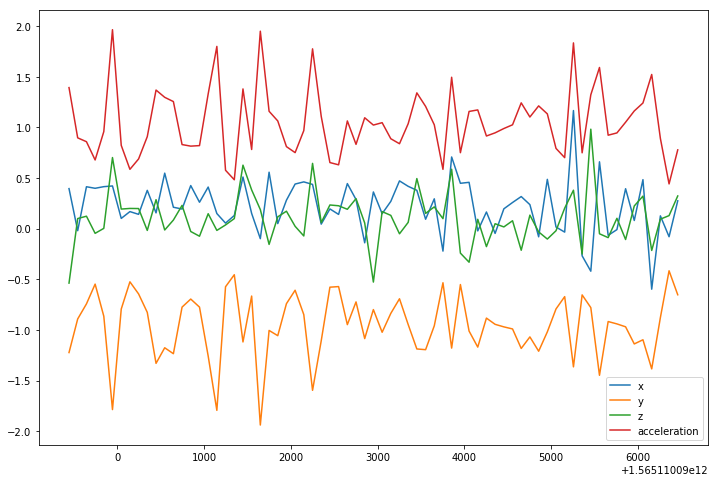

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df3l3.timestamp,df3l3.x)
plt.plot(df3l3.timestamp,df3l3.y)
plt.plot(df3l3.timestamp,df3l3.z)
plt.plot(df3l3.timestamp,df3l3.acceleration)
plt.legend()
plt.show()

In [19]:
df3l4 = df3.loc[961:1031]
df3l4.head(20)

,timestamp,x,y,z,label,acceleration
961,1565110027107,-0.209259,-1.027649,-0.152679,2.0,1.059794
962,1565110027207,0.256180,-0.961060,-0.075882,2.0,0.997508
963,1565110027307,0.096832,-1.050201,-0.006042,2.0,1.054673
964,1565110027407,0.159668,-0.936996,-0.057343,3.0,0.952231
965,1565110027508,0.232162,-0.956436,0.016586,3.0,0.984350
966,1565110027608,0.166428,-0.953629,-0.030334,3.0,0.968517
967,1565110027708,0.320312,-0.939697,-0.070023,3.0,0.995256
968,1565110027808,0.250458,-1.226395,0.239426,3.0,1.274401
969,1565110027909,-0.451660,-1.139252,0.127563,3.0,1.232138
970,1565110028009,0.503296,-0.866394,0.189575,3.0,1.019747


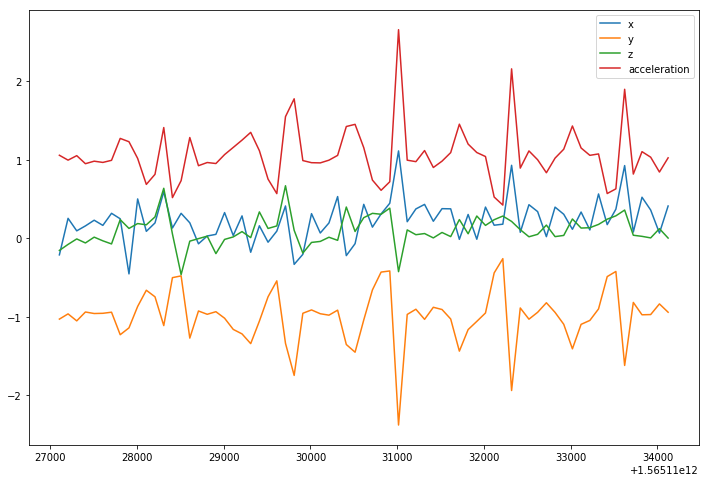

In [20]:
plt.figure(figsize=(12,8))
plt.plot(df3l4.timestamp,df3l4.x)
plt.plot(df3l4.timestamp,df3l4.y)
plt.plot(df3l4.timestamp,df3l4.z)
plt.plot(df3l4.timestamp,df3l4.acceleration)
plt.legend()
plt.show()

In [21]:
i = 0
j= 10
movelet_l1x = []
for n in range(30):
    movelet_l1x.append(df3l1.x[i:j])
    i+=1
    j+=1


In [22]:
len(movelet_l1x)

30

In [23]:
columns = ['x','y','z','acceleration']
movelet_dictionary_l1 =pd.DataFrame(columns = columns)
for c in columns:
    i = 0
    j = 10
    movelet_column = []
    for n in range(50):
        movelet_column.append(df3l1[c][i:j])
        i+=1
        j+=1
    movelet_dictionary_l1[c] = movelet_column
        

In [24]:
movelet_dictionary_l1

,x,y,z,acceleration
0,5 -0.010880 6 0.052841 7 0.032974 8...,5 -0.967575 6 -0.982330 7 -1.053207 8...,5 0.170898 6 0.235565 7 0.256714 8...,5 0.982612 6 1.011561 7 1.084544 8...
1,6 0.052841 7 0.032974 8 -0.090424 9...,6 -0.982330 7 -1.053207 8 -0.972794 9...,6 0.235565 7 0.256714 8 0.356308 9...,6 1.011561 7 1.084544 8 1.039932 9...
2,7 0.032974 8 -0.090424 9 0.124268 1...,7 -1.053207 8 -0.972794 9 -0.890533 1...,7 0.256714 8 0.356308 9 0.223221 1...,7 1.084544 8 1.039932 9 0.926455 1...
3,8 -0.090424 9 0.124268 10 -0.031784 1...,8 -0.972794 9 -0.890533 10 -0.893982 1...,8 0.356308 9 0.223221 10 0.264236 1...,8 1.039932 9 0.926455 10 0.932757 1...
4,9 0.124268 10 -0.031784 11 -0.097427 1...,9 -0.890533 10 -0.893982 11 -0.902725 1...,9 0.223221 10 0.264236 11 0.137680 1...,9 0.926455 10 0.932757 11 0.918347 1...
5,10 -0.031784 11 -0.097427 12 -0.094864 1...,10 -0.893982 11 -0.902725 12 -1.197876 1...,10 0.264236 11 0.137680 12 0.128494 1...,10 0.932757 11 0.918347 12 1.208477 1...
6,11 -0.097427 12 -0.094864 13 0.013718 1...,11 -0.902725 12 -1.197876 13 -0.852371 1...,11 0.137680 12 0.128494 13 -0.000870 1...,11 0.918347 12 1.208477 13 0.852482 1...
7,12 -0.094864 13 0.013718 14 0.067947 1...,12 -1.197876 13 -0.852371 14 -0.988525 1...,12 0.128494 13 -0.000870 14 0.034973 1...,12 1.208477 13 0.852482 14 0.991475 1...
8,13 0.013718 14 0.067947 15 -0.049255 1...,13 -0.852371 14 -0.988525 15 -1.031082 1...,13 -0.000870 14 0.034973 15 0.008942 1...,13 0.852482 14 0.991475 15 1.032297 1...
9,14 0.067947 15 -0.049255 16 0.109711 1...,14 -0.988525 15 -1.031082 16 -0.992325 1...,14 0.034973 15 0.008942 16 -0.090561 1...,14 0.991475 15 1.032297 16 1.002470 1...


In [25]:
# Define function for creating movelet dictionaries for each label

In [26]:
def movelet_dict_generator (dataframe,columns):
    movelet_dictionary =pd.DataFrame(columns = columns)
    for c in columns:
        i = 0
        j = 10
        movelet_column = []
        for n in range(50):
            movelet_column.append(dataframe[c][i:j])
            i+=1
            j+=1
        movelet_dictionary[c] = movelet_column
    return movelet_dictionary

In [27]:
movelet_dictionary_l2 = movelet_dict_generator(df3l2,['x','y','z','acceleration'])

In [28]:
movelet_dictionary_l3 = movelet_dict_generator(df3l3,['x','y','z','acceleration'])
movelet_dictionary_l4 = movelet_dict_generator(df3l4,['x','y','z','acceleration'])
movelet_dictionary_l1 = movelet_dict_generator(df3l1,['x','y','z','acceleration'])

In [29]:
movelet_dictionary_l1.head()

,x,y,z,acceleration
0,5 -0.010880 6 0.052841 7 0.032974 8...,5 -0.967575 6 -0.982330 7 -1.053207 8...,5 0.170898 6 0.235565 7 0.256714 8...,5 0.982612 6 1.011561 7 1.084544 8...
1,6 0.052841 7 0.032974 8 -0.090424 9...,6 -0.982330 7 -1.053207 8 -0.972794 9...,6 0.235565 7 0.256714 8 0.356308 9...,6 1.011561 7 1.084544 8 1.039932 9...
2,7 0.032974 8 -0.090424 9 0.124268 1...,7 -1.053207 8 -0.972794 9 -0.890533 1...,7 0.256714 8 0.356308 9 0.223221 1...,7 1.084544 8 1.039932 9 0.926455 1...
3,8 -0.090424 9 0.124268 10 -0.031784 1...,8 -0.972794 9 -0.890533 10 -0.893982 1...,8 0.356308 9 0.223221 10 0.264236 1...,8 1.039932 9 0.926455 10 0.932757 1...
4,9 0.124268 10 -0.031784 11 -0.097427 1...,9 -0.890533 10 -0.893982 11 -0.902725 1...,9 0.223221 10 0.264236 11 0.137680 1...,9 0.926455 10 0.932757 11 0.918347 1...


In [30]:
movelet_dictionary_l2.head()

,x,y,z,acceleration
0,93 0.154510 94 0.334381 95 -0.06303...,93 -0.843460 94 -0.960007 95 -0.95217...,93 0.010544 94 0.024582 95 0.06204...,93 0.857560 94 1.016872 95 0.95627...
1,94 0.334381 95 -0.063034 96 0.23399...,94 -0.960007 95 -0.952179 96 -0.95793...,94 0.024582 95 0.062042 96 0.03883...,94 1.016872 95 0.956278 96 0.98686...
2,95 -0.063034 96 0.233994 97 0.24557...,95 -0.952179 96 -0.957932 97 -0.98208...,95 0.062042 96 0.038834 97 -0.06196...,95 0.956278 96 0.986861 97 1.01421...
3,96 0.233994 97 0.245575 98 0.32356...,96 -0.957932 97 -0.982086 98 -1.19041...,96 0.038834 97 -0.061966 98 0.19599...,96 0.986861 97 1.014219 98 1.24907...
4,97 0.245575 98 0.323563 99 0.02265...,97 -0.982086 98 -1.190414 99 -1.33398...,97 -0.061966 98 0.195999 99 0.10714...,97 1.014219 98 1.249078 99 1.33847...


In [31]:
movelet_dictionary_l3.head()

,x,y,z,acceleration
0,1582 0.395767 1583 -0.019714 1584 0.41...,1582 -1.222717 1583 -0.891068 1584 -0.74...,1582 -0.537125 1583 0.100052 1584 0.12...,1582 1.392901 1583 0.896884 1584 0.85...
1,1583 -0.019714 1584 0.414230 1585 0.39...,1583 -0.891068 1584 -0.742172 1585 -0.54...,1583 0.100052 1584 0.123383 1585 -0.04...,1583 0.896884 1584 0.858854 1585 0.67...
2,1584 0.414230 1585 0.398895 1586 0.41...,1584 -0.742172 1585 -0.547028 1586 -0.86...,1584 0.123383 1585 -0.045731 1586 0.00...,1584 0.858854 1585 0.678563 1586 0.95...
3,1585 0.398895 1586 0.415039 1587 0.42...,1585 -0.547028 1586 -0.864029 1587 -1.78...,1585 -0.045731 1586 0.003357 1587 0.70...,1585 0.678563 1586 0.958548 1587 1.96...
4,1586 0.415039 1587 0.421906 1588 0.10...,1586 -0.864029 1587 -1.785599 1588 -0.79...,1586 0.003357 1587 0.702393 1588 0.19...,1586 0.958548 1587 1.964618 1588 0.82...


In [32]:
movelet_dictionary_l4.head()

,x,y,z,acceleration
0,961 -0.209259 962 0.256180 963 0.09683...,961 -1.027649 962 -0.961060 963 -1.05020...,961 -0.152679 962 -0.075882 963 -0.00604...,961 1.059794 962 0.997508 963 1.05467...
1,962 0.256180 963 0.096832 964 0.15966...,962 -0.961060 963 -1.050201 964 -0.93699...,962 -0.075882 963 -0.006042 964 -0.05734...,962 0.997508 963 1.054673 964 0.95223...
2,963 0.096832 964 0.159668 965 0.23216...,963 -1.050201 964 -0.936996 965 -0.95643...,963 -0.006042 964 -0.057343 965 0.01658...,963 1.054673 964 0.952231 965 0.98435...
3,964 0.159668 965 0.232162 966 0.16642...,964 -0.936996 965 -0.956436 966 -0.95362...,964 -0.057343 965 0.016586 966 -0.03033...,964 0.952231 965 0.984350 966 0.96851...
4,965 0.232162 966 0.166428 967 0.32031...,965 -0.956436 966 -0.953629 967 -0.93969...,965 0.016586 966 -0.030334 967 -0.07002...,965 0.984350 966 0.968517 967 0.99525...


In [33]:
movelet_dictionary_l1['label'] = 1
movelet_dictionary_l2['label'] = 2
movelet_dictionary_l3['label'] = 3
movelet_dictionary_l4['label'] = 4


In [34]:
movelet_dictionary_l1.x[0]

5    -0.010880
6     0.052841
7     0.032974
8    -0.090424
9     0.124268
10   -0.031784
11   -0.097427
12   -0.094864
13    0.013718
14    0.067947
Name: x, dtype: float64

In [35]:
movelet_dict = pd.concat([movelet_dictionary_l1,movelet_dictionary_l2,movelet_dictionary_l3,movelet_dictionary_l4], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [36]:
movelet_dict


,x,y,z,acceleration,label
0,5 -0.010880 6 0.052841 7 0.032974 8...,5 -0.967575 6 -0.982330 7 -1.053207 8...,5 0.170898 6 0.235565 7 0.256714 8...,5 0.982612 6 1.011561 7 1.084544 8...,1
1,6 0.052841 7 0.032974 8 -0.090424 9...,6 -0.982330 7 -1.053207 8 -0.972794 9...,6 0.235565 7 0.256714 8 0.356308 9...,6 1.011561 7 1.084544 8 1.039932 9...,1
2,7 0.032974 8 -0.090424 9 0.124268 1...,7 -1.053207 8 -0.972794 9 -0.890533 1...,7 0.256714 8 0.356308 9 0.223221 1...,7 1.084544 8 1.039932 9 0.926455 1...,1
3,8 -0.090424 9 0.124268 10 -0.031784 1...,8 -0.972794 9 -0.890533 10 -0.893982 1...,8 0.356308 9 0.223221 10 0.264236 1...,8 1.039932 9 0.926455 10 0.932757 1...,1
4,9 0.124268 10 -0.031784 11 -0.097427 1...,9 -0.890533 10 -0.893982 11 -0.902725 1...,9 0.223221 10 0.264236 11 0.137680 1...,9 0.926455 10 0.932757 11 0.918347 1...,1
5,10 -0.031784 11 -0.097427 12 -0.094864 1...,10 -0.893982 11 -0.902725 12 -1.197876 1...,10 0.264236 11 0.137680 12 0.128494 1...,10 0.932757 11 0.918347 12 1.208477 1...,1
6,11 -0.097427 12 -0.094864 13 0.013718 1...,11 -0.902725 12 -1.197876 13 -0.852371 1...,11 0.137680 12 0.128494 13 -0.000870 1...,11 0.918347 12 1.208477 13 0.852482 1...,1
7,12 -0.094864 13 0.013718 14 0.067947 1...,12 -1.197876 13 -0.852371 14 -0.988525 1...,12 0.128494 13 -0.000870 14 0.034973 1...,12 1.208477 13 0.852482 14 0.991475 1...,1
8,13 0.013718 14 0.067947 15 -0.049255 1...,13 -0.852371 14 -0.988525 15 -1.031082 1...,13 -0.000870 14 0.034973 15 0.008942 1...,13 0.852482 14 0.991475 15 1.032297 1...,1
9,14 0.067947 15 -0.049255 16 0.109711 1...,14 -0.988525 15 -1.031082 16 -0.992325 1...,14 0.034973 15 0.008942 16 -0.090561 1...,14 0.991475 15 1.032297 16 1.002470 1...,1


In [37]:
X_test = df3[['x','y','z','acceleration','label']][657:667]

In [38]:
X_test

,x,y,z,acceleration,label
669,0.284363,-1.103989,0.126053,1.146971,2.0
670,0.488174,-1.160095,0.143585,1.266788,2.0
671,-0.331894,-1.407028,-0.326660,1.482089,2.0
672,0.587433,-0.842270,-0.185715,1.043545,2.0
673,-0.206985,-0.441696,-0.015518,0.488036,2.0
674,-0.063339,-0.671127,0.226624,0.711183,2.0
675,0.249725,0.041824,0.154251,0.296488,2.0
676,1.622131,-2.347061,0.576920,2.910815,2.0
677,-0.360825,-0.790237,-0.398422,0.955725,2.0
678,0.471649,-0.668610,0.479965,0.948609,2.0


In [39]:
#ahora tengo que sacar la diferencia entre el movelet incongnita y el diccionario de movelet

In [40]:
mdictx =movelet_dict['x'][2].reset_index(drop = True)

In [41]:
mdictx

0    0.032974
1   -0.090424
2    0.124268
3   -0.031784
4   -0.097427
5   -0.094864
6    0.013718
7    0.067947
8   -0.049255
9    0.109711
Name: x, dtype: float64

In [42]:
X_test_x = X_test['x'].reset_index(drop = True)

In [43]:
X_test_x

0    0.284363
1    0.488174
2   -0.331894
3    0.587433
4   -0.206985
5   -0.063339
6    0.249725
7    1.622131
8   -0.360825
9    0.471649
Name: x, dtype: float64

In [44]:
diff = mdictx - X_test_x

In [45]:
diff

0   -0.251389
1   -0.578598
2    0.456161
3   -0.619217
4    0.109558
5   -0.031525
6   -0.236008
7   -1.554184
8    0.311569
9   -0.361938
Name: x, dtype: float64

In [46]:
np.sum(diff**2)

3.701743810204789

In [47]:
def label_prediction(X_test,movelet_dict):
    #x_testx = X_test['x'].reset_index(drop = True)
    #x_testy = X_test['y'].reset_index(drop = True)
    #x_testz = X_test['z'].reset_index(drop =True)
    #x_testa = X_test['acceleration'].reset_index(drop =True)
    min_label_predict = []
    axis = ['x','y','z','acceleration']
    for j in axis:
        differences= []
        for i in range(movelet_dict.shape[0]):
            mdict = movelet_dict[j][i].reset_index(drop = True)
            X_test_val = X_test[j].reset_index(drop = True)
            diff = np.sum((mdict - X_test_val)**2)
            differences.append(diff)
        min_loc = differences.index(min(differences))
        min_label = movelet_dict['label'][min_loc]
        min_label_predict.append(min_label)
    return min_label_predict
    


In [48]:
labels = label_prediction(X_test,movelet_dict )

In [49]:
len(labels)

4

In [50]:
labels

[4, 4, 2, 4]

In [51]:
min_label_predict = []
#axis = ['x','y','z','acceleration']
axis = 'z'
for j in axis:
    differences= []
    for i in range(movelet_dict.shape[0]):
        mdict = movelet_dict[j][i].reset_index(drop = True)
        X_test_val = X_test[j].reset_index(drop = True)
        diff = np.sum((mdict - X_test_val)**2)
        differences.append(diff)
    min_loc = differences.index(min(differences))
    min_label = movelet_dict['label'][min_loc]
    min_label_predict.append(min_label)
print(min_label_predict)


[2]


In [52]:
print (min_loc)
differences[min_loc]

71


0.4773765066638589

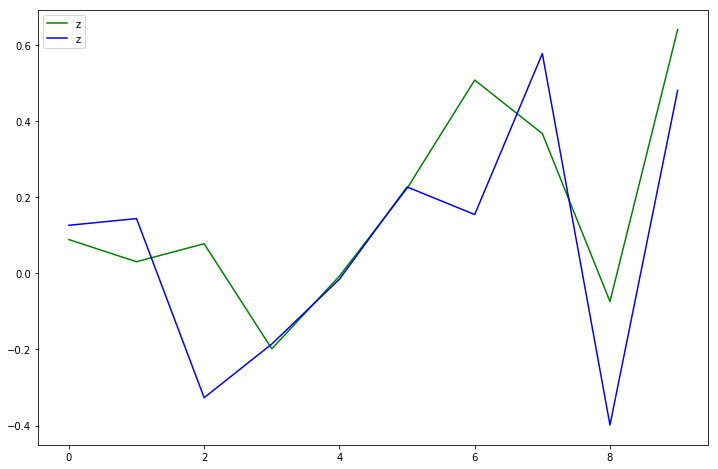

In [53]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(10),movelet_dict.z[71], color = 'green')
#plt.plot(range(10),x_testy, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')

#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [54]:
# Bueno hasta aca hago un buen emparejamiento de series de tiempo, pero la prediccion no es buena.
# Tengo que ajustar el movelet dic a ver si achicando el tamano y apuntando a la parte que mejor describe el 
# moviemiento logro mejorar la prediccion

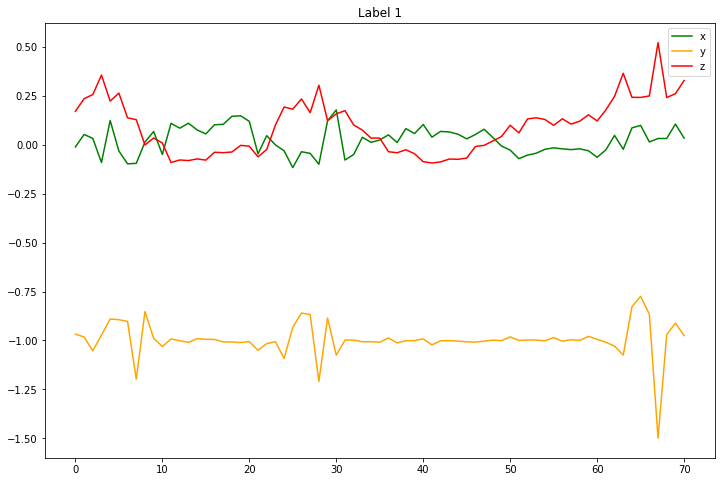

In [55]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(df3l1.shape[0]),df3l1.x, color = 'green')
plt.plot(range(df3l1.shape[0]),df3l1.y, color = 'orange')
plt.plot(range(df3l1.shape[0]),df3l1.z,color = 'red')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 1')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

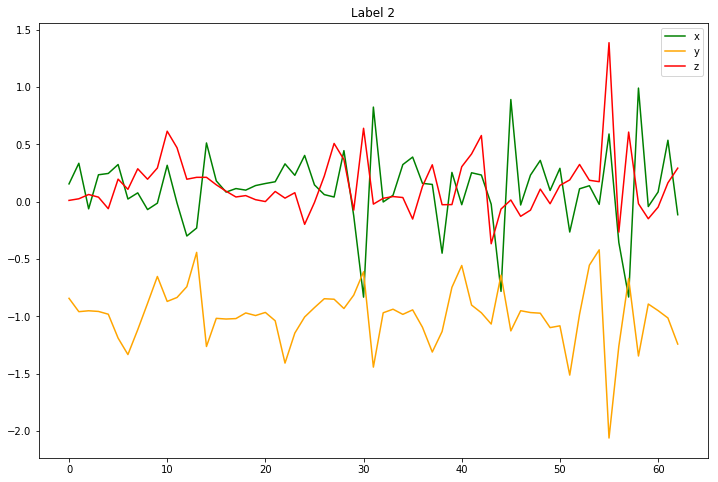

In [56]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(df3l2.shape[0]),df3l2.x, color = 'green')
plt.plot(range(df3l2.shape[0]),df3l2.y, color = 'orange')
plt.plot(range(df3l2.shape[0]),df3l2.z,color = 'red')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 2')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

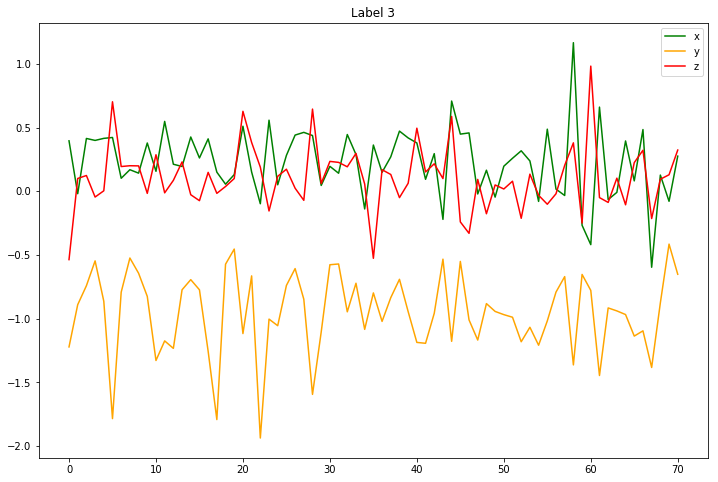

In [57]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(df3l3.shape[0]),df3l3.x, color = 'green')
plt.plot(range(df3l3.shape[0]),df3l3.y, color = 'orange')
plt.plot(range(df3l3.shape[0]),df3l3.z,color = 'red')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 3')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

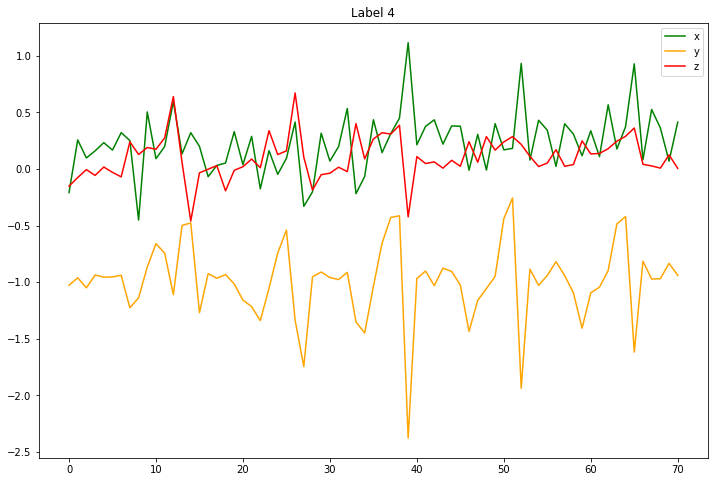

In [58]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(df3l4.shape[0]),df3l4.x, color = 'green')
plt.plot(range(df3l4.shape[0]),df3l4.y, color = 'orange')
plt.plot(range(df3l4.shape[0]),df3l4.z,color = 'red')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 4')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [59]:
#Antes de avanzar en acortar los movelets vamos a ver que pasa si trabajamos en un dataframe en el que no hayamos
#rellenado los gaps

In [60]:
dfsmall = pd.merge(df_trts,df_trl, on=['timestamp'])

In [61]:
dfsmall

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1
5,20639,1565109936099,2019-08-06T16:45:36.099,unknown,0.037582,-0.998383,0.019333,20639,2019-08-06T16:45:36.099,1
6,20649,1565109937101,2019-08-06T16:45:37.101,unknown,-0.020554,-0.999741,0.120789,20649,2019-08-06T16:45:37.101,1
7,20659,1565109938103,2019-08-06T16:45:38.103,unknown,0.032440,-0.970337,0.241425,20659,2019-08-06T16:45:38.103,1
8,20669,1565109939106,2019-08-06T16:45:39.106,unknown,0.212524,-0.976364,0.074997,20669,2019-08-06T16:45:39.106,1
9,20679,1565109940108,2019-08-06T16:45:40.108,unknown,0.154510,-0.843460,0.010544,20679,2019-08-06T16:45:40.108,2


In [62]:
df.to_csv(r'dfsmall.csv')

In [64]:
dfsmall['acceleration'] = (dfsmall.x**2 + dfsmall.y**2 + dfsmall.z**2)**0.5

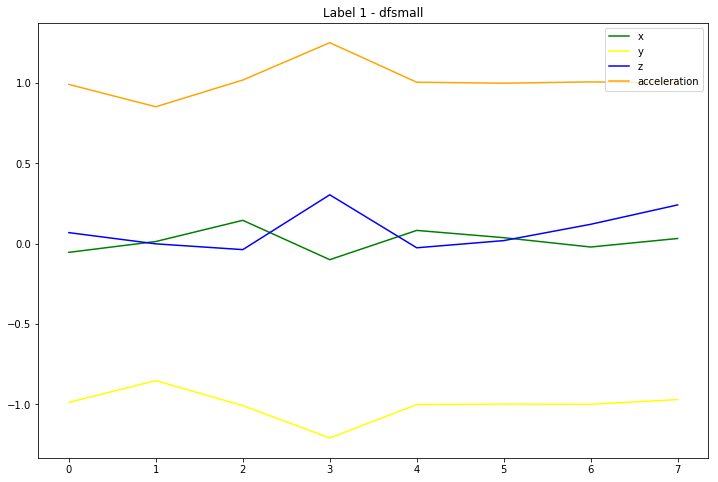

In [65]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(dfsmall[0:8].shape[0]),dfsmall[0:8].x, color = 'green')
plt.plot(range(dfsmall[0:8].shape[0]),dfsmall[0:8].y, color = 'yellow')
plt.plot(range(dfsmall[0:8].shape[0]),dfsmall[0:8].z, color = 'blue')
plt.plot(range(dfsmall[0:8].shape[0]),dfsmall[0:8].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 1 - dfsmall')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

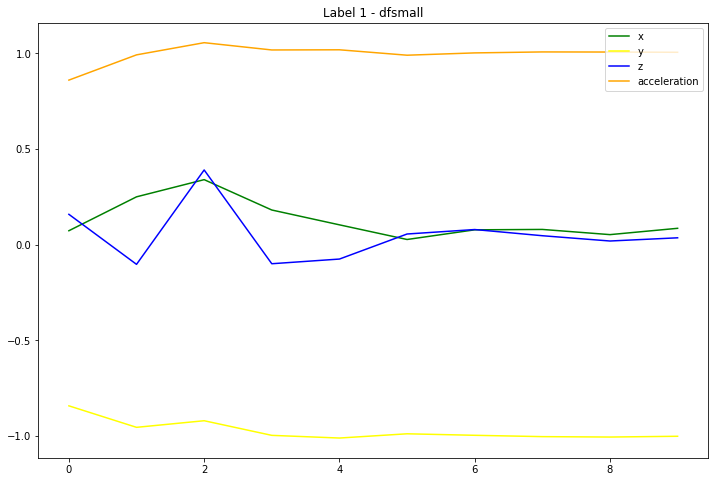

In [69]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(dfsmall[134:144].shape[0]),dfsmall[134:144].x, color = 'green')
plt.plot(range(dfsmall[134:144].shape[0]),dfsmall[134:144].y, color = 'yellow')
plt.plot(range(dfsmall[134:144].shape[0]),dfsmall[134:144].z, color = 'blue')
plt.plot(range(dfsmall[134:144].shape[0]),dfsmall[134:144].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 1 - dfsmall')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

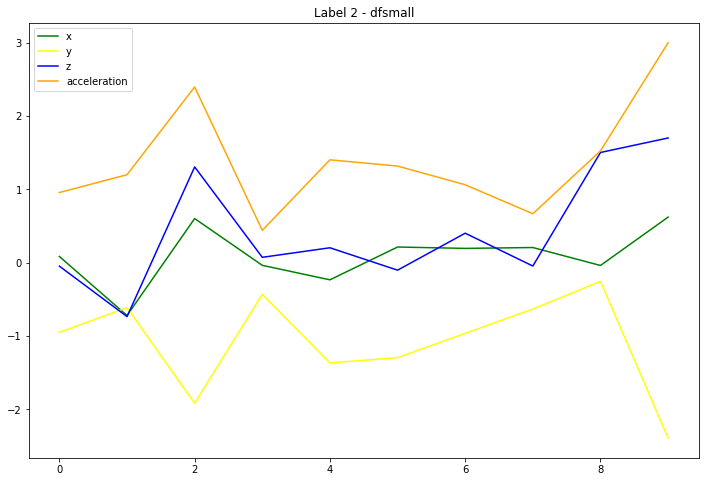

In [68]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(dfsmall[15:25].shape[0]),dfsmall[15:25].x, color = 'green')
plt.plot(range(dfsmall[15:25].shape[0]),dfsmall[15:25].y, color = 'yellow')
plt.plot(range(dfsmall[15:25].shape[0]),dfsmall[15:25].z, color = 'blue')
plt.plot(range(dfsmall[15:25].shape[0]),dfsmall[15:25].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 2 - dfsmall')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

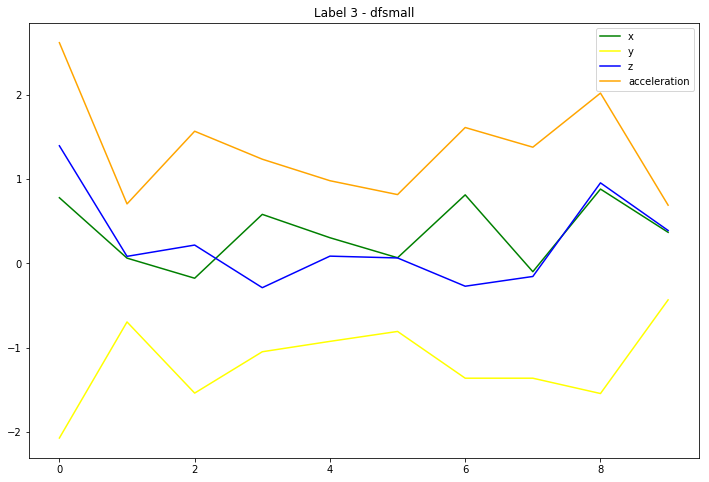

In [71]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(dfsmall[255:265].shape[0]),dfsmall[255:265].x, color = 'green')
plt.plot(range(dfsmall[255:265].shape[0]),dfsmall[255:265].y, color = 'yellow')
plt.plot(range(dfsmall[255:265].shape[0]),dfsmall[255:265].z, color = 'blue')
plt.plot(range(dfsmall[255:265].shape[0]),dfsmall[255:265].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 3 - dfsmall')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

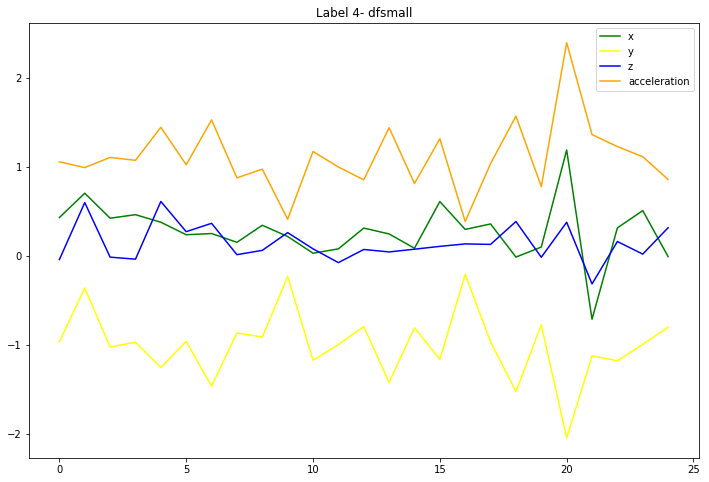

In [73]:
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(dfsmall[105:115].shape[0]),dfsmall[105:130].x, color = 'green')
plt.plot(range(dfsmall[105:15].shape[0]),dfsmall[105:130].y, color = 'yellow')
plt.plot(range(dfsmall[105:130].shape[0]),dfsmall[105:130].z, color = 'blue')
plt.plot(range(dfsmall[105:130].shape[0]),dfsmall[105:130].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('Label 4- dfsmall')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [75]:
dfsl1 = dfsmall[['x','y','z','acceleration']][140:150]

In [76]:
dfsl2 = dfsmall[['x','y','z','acceleration']][40:50]

In [77]:
dfsl3 = dfsmall[['x','y','z','acceleration']][250:260]
dfsl4 = dfsmall[['x','y','z','acceleration']][100:110]

In [78]:
def movelet_dict_generator_small (dataframe,columns):
    movelet_dictionary =pd.DataFrame(columns = columns)
    for c in columns:
        i = 0
        j = 2
        movelet_column = []
        for n in range(5):
            movelet_column.append(dataframe[c][i:j])
            i+=1
            j+=1
        movelet_dictionary[c] = movelet_column
    return movelet_dictionary

In [82]:
movelet_dict_small_1 = movelet_dict_generator_small(dfsl1,['x','y','z','acceleration'])

In [83]:
movelet_dict_small_1.shape

(5, 4)

In [84]:
movelet_dict_small_2 = movelet_dict_generator_small(dfsl2,['x','y','z','acceleration'])
movelet_dict_small_3 = movelet_dict_generator_small(dfsl3,['x','y','z','acceleration'])
movelet_dict_small_4 = movelet_dict_generator_small(dfsl4,['x','y','z','acceleration'])

In [85]:
movelet_dict_small_1['label'] = 1
movelet_dict_small_2['label'] = 2
movelet_dict_small_3['label'] = 3
movelet_dict_small_4 ['label'] = 4

In [88]:
movelet_dict_small = pd.concat([movelet_dict_small_1,movelet_dict_small_2,movelet_dict_small_3,movelet_dict_small_4], axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

In [89]:
movelet_dict_small

,x,y,z,acceleration,label
0,"140 0.077652 141 0.079727 Name: x, dtype...","140 -0.995956 141 -1.002930 Name: y, dtype...","140 0.079163 141 0.046844 Name: z, dtype...",140 1.002111 141 1.007184 Name: accelera...,1
1,"141 0.079727 142 0.052582 Name: x, dtype...","141 -1.002930 142 -1.005066 Name: y, dtype...","141 0.046844 142 0.019226 Name: z, dtype...",141 1.007184 142 1.006624 Name: accelera...,1
2,"142 0.052582 143 0.085571 Name: x, dtype...","142 -1.005066 143 -1.001053 Name: y, dtype...","142 0.019226 143 0.035950 Name: z, dtype...",142 1.006624 143 1.005347 Name: accelera...,1
3,"143 0.085571 144 0.087631 Name: x, dtype...","143 -1.001053 144 -0.997650 Name: y, dtype...","143 0.035950 144 0.052856 Name: z, dtype...",143 1.005347 144 1.002885 Name: accelera...,1
4,"144 0.087631 145 0.090073 Name: x, dtype...","144 -0.997650 145 -0.996307 Name: y, dtype...","144 0.052856 145 0.081543 Name: z, dtype...",144 1.002885 145 1.003689 Name: accelera...,1
5,"40 0.134842 41 0.180298 Name: x, dtype: ...","40 -0.859589 41 -1.163727 Name: y, dtype: ...","40 0.127869 41 0.174957 Name: z, dtype: ...",40 0.879446 41 1.190537 Name: accelerati...,2
6,"41 0.180298 42 0.053894 Name: x, dtype: ...","41 -1.163727 42 -0.849533 Name: y, dtype: ...","41 0.174957 42 -0.084595 Name: z, dtype: ...",41 1.190537 42 0.855434 Name: accelerati...,2
7,"42 0.053894 43 0.138748 Name: x, dtype: ...","42 -0.849533 43 -2.646240 Name: y, dtype: ...","42 -0.084595 43 1.121811 Name: z, dtype: ...",42 0.855434 43 2.877551 Name: accelerati...,2
8,"43 0.138748 44 -0.081711 Name: x, dtype: ...","43 -2.64624 44 -0.38797 Name: y, dtype: fl...","43 1.121811 44 0.009644 Name: z, dtype: ...",43 2.877551 44 0.396598 Name: accelerati...,2
9,"44 -0.081711 45 0.463791 Name: x, dtype: ...","44 -0.387970 45 -0.831192 Name: y, dtype: ...","44 0.009644 45 -0.181320 Name: z, dtype: ...",44 0.396598 45 0.968947 Name: accelerati...,2


In [103]:
X_test_small = dfsmall[['x','y','z','acceleration','label']][123:125]

In [104]:
labels = label_prediction(X_test_small,movelet_dict_small )

In [105]:
labels

[1, 4, 4, 4]

In [106]:
#VAmos a ajustar la funcion de label prediction para buscar el movelet en el que la sumatoria de las diferencias
#para x,y,z,acceleration la diferencia es menor


In [234]:
def label_prediction_improved(X_test,movelet_dict):
    #x_testx = X_test['x'].reset_index(drop = True)
    #x_testy = X_test['y'].reset_index(drop = True)
    #x_testz = X_test['z'].reset_index(drop =True)
    #x_testa = X_test['acceleration'].reset_index(drop =True)
    #min_label_predict = []
    axis = ['x','y','z','acceleration']
    differences = pd.DataFrame()
    for j in axis:
        diff_list =[]
        for i in range(movelet_dict.shape[0]):
            mdict = movelet_dict[j][i].reset_index(drop = True)
            X_test_val = X_test[j].reset_index(drop = True)
            diff = np.sum((mdict - X_test_val)**2)
            diff_list.append(diff)
        differences[j] = diff_list
    differences['total_diff'] = differences.sum (axis = 1)
    min_loc = differences['total_diff'].idxmin()
    min_label = movelet_dict['label'][min_loc]
    #min_label_predict.append(min_label)
    #print(differences[min_loc-10:min_loc+10])
    return (min_loc,min_label)

In [178]:
label_prediction_improved(X_test,movelet_dict)

            x         y         z  acceleration  total_diff
0    4.351870  2.762561  1.260422      3.788674   12.163527
1    3.726420  4.416974  1.488837      5.578193   15.210424
2    3.701744  3.605116  1.409461      4.810590   13.526912
3    4.048139  3.906336  1.327984      5.001256   14.283714
4    3.588398  3.914095  1.259070      4.907492   13.669055
5    3.665519  3.615438  1.204524      4.761215   13.246697
6    3.606575  3.843340  1.160463      4.924184   13.534562
7    3.776311  3.820422  1.134934      4.961316   13.692983
8    3.506569  3.738306  1.128853      4.883974   13.257702
9    3.573964  3.716336  1.014986      4.823550   13.128837
10   3.435704  3.664895  1.019784      4.753096   12.873480
11   3.331060  3.684477  1.051343      4.751219   12.818099
12   3.437933  3.728560  1.058779      4.778669   13.003941
13   3.273551  3.760448  0.976295      4.838206   12.848500
14   4.010920  3.617043  0.963674      4.676131   13.267768
15   3.698502  3.853442  0.972834      4

(182, 4)

In [179]:
movelet_dict['label'][195]

4

In [180]:
X_test_1 = df3[['x','y','z','acceleration']][70:80]

In [181]:
label_prediction_improved(X_test_1,movelet_dict)

            x         y         z  acceleration  total_diff
0    0.204468  0.100969  0.125175      0.082221    0.512833
1    0.134203  0.102932  0.072962      0.100217    0.410315
2    0.122842  0.102611  0.050306      0.114080    0.389839
3    0.146535  0.070197  0.061840      0.083873    0.362445
4    0.148831  0.089658  0.084793      0.082613    0.405895
5    0.089815  0.070088  0.165265      0.063711    0.388878
6    0.115415  0.103760  0.244796      0.104514    0.568484
7    0.105247  0.061030  0.297300      0.057354    0.520931
8    0.084671  0.025201  0.398827      0.025770    0.534469
9    0.092533  0.017337  0.453943      0.009049    0.572862
10   0.057044  0.013810  0.507249      0.005285    0.583387
11   0.063993  0.010836  0.544489      0.003686    0.623005
12   0.076608  0.014611  0.531547      0.008100    0.630867
13   0.099354  0.012625  0.499549      0.006937    0.618465
14   0.160046  0.012396  0.469188      0.004949    0.646579
15   0.154252  0.020518  0.481727      0

(29, 1)

In [183]:
X_test_3 = df3[['x','y','z','acceleration']][1550:1560]

In [187]:
label_prediction_improved(X_test_3,movelet_dict)

            x         y         z  acceleration  total_diff
114  0.924243  3.650267  0.825525      4.032289    9.432324
115  0.581915  5.068957  1.078180      5.174548   11.903600
116  0.778399  3.820660  0.500633      3.640379    8.740072
117  0.717170  3.527101  0.768147      3.949119    8.961537
118  0.827977  1.076804  0.996005      1.106145    4.006931
119  0.388041  2.685648  1.465875      3.154549    7.694113
120  0.972841  2.439278  1.020417      2.662870    7.095405
121  0.721302  4.010892  0.604924      4.364817    9.701934
122  0.643589  4.289873  0.733206      4.529532   10.196200
123  0.589114  1.680366  1.142829      2.073087    5.485396
124  0.183387  0.169854  0.087547      0.190903    0.631691
125  0.746160  1.732636  0.870271      2.264043    5.613110
126  0.827231  2.516665  1.451664      2.918067    7.713628
127  0.651941  2.616989  1.317001      2.927533    7.513463
128  0.584934  1.663085  1.428264      2.059112    5.735395
129  0.533074  1.440837  0.855526      1

(124, 3)

In [188]:
X_test_4 = df3[['x','y','z','acceleration']][3610:3620]

In [189]:
label_prediction_improved(X_test_4,movelet_dict)

            x         y         z  acceleration  total_diff
170  2.290087  7.169636  1.906812      8.594974   19.961509
171  2.843560  7.185630  2.289106      8.726197   21.044493
172  2.861871  5.614913  2.364897      6.732655   17.574337
173  1.439166  4.961433  1.621776      5.658034   13.680410
174  3.251170  3.818658  1.352962      4.659748   13.082538
175  3.666366  3.932223  1.731288      4.748216   14.078092
176  2.732358  6.237746  1.404498      6.834712   17.209314
177  2.708474  7.964861  0.597692      9.077124   20.348151
178  2.540306  7.831520  0.711693      8.660706   19.744225
179  1.494277  6.685454  0.856976      7.045943   16.082649
180  1.109332  0.468788  1.746394      0.573304    3.897818
181  2.771139  7.270919  2.253768      8.062815   20.358641
182  3.086341  8.696555  2.208319     10.326416   24.317631
183  3.325958  9.545589  2.079343     11.028151   25.979041
184  2.645646  9.175072  1.728819     10.290221   23.839758
185  3.987009  6.301688  1.487079      7

(180, 4)

In [190]:
#Bueno, ahora que tenemos el algoritmo lo que tengo que hacer es procesar los datos de la muestra incognita
#y meterlos

In [196]:
dftestts = pd.read_csv('test_time_series.csv')

In [197]:
dftestl= pd.read_csv('test_labels.csv')

In [198]:
dftestts.head(20)

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550
5,24335,1565110306640,2019-08-06T16:51:46.640,unknown,0.583969,-0.513306,0.924362
6,24336,1565110306740,2019-08-06T16:51:46.740,unknown,-0.058807,-0.752899,0.238098
7,24337,1565110306841,2019-08-06T16:51:46.841,unknown,0.463318,-1.152679,0.013855
8,24338,1565110306941,2019-08-06T16:51:46.941,unknown,0.397049,-0.891922,0.000656
9,24339,1565110307041,2019-08-06T16:51:47.041,unknown,0.098282,-0.833771,0.118042


In [199]:
dftestl.head(20)

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN
5,24389,1565110312045,2019-08-06T16:51:52.045,NaN
6,24399,1565110313047,2019-08-06T16:51:53.047,NaN
7,24409,1565110314049,2019-08-06T16:51:54.049,NaN
8,24419,1565110315051,2019-08-06T16:51:55.051,NaN
9,24429,1565110316054,2019-08-06T16:51:56.054,NaN


In [204]:
#merge dataframe
dftest = pd.merge(dftestts,dftestl, on=['timestamp'], how = 'left')

In [205]:
dftest.shape

(1250, 10)

In [206]:
dftest

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623,NaN,NaN,NaN
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975,NaN,NaN,NaN
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771,NaN,NaN,NaN
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810,NaN,NaN,NaN
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550,NaN,NaN,NaN
5,24335,1565110306640,2019-08-06T16:51:46.640,unknown,0.583969,-0.513306,0.924362,NaN,NaN,NaN
6,24336,1565110306740,2019-08-06T16:51:46.740,unknown,-0.058807,-0.752899,0.238098,NaN,NaN,NaN
7,24337,1565110306841,2019-08-06T16:51:46.841,unknown,0.463318,-1.152679,0.013855,NaN,NaN,NaN
8,24338,1565110306941,2019-08-06T16:51:46.941,unknown,0.397049,-0.891922,0.000656,NaN,NaN,NaN
9,24339,1565110307041,2019-08-06T16:51:47.041,unknown,0.098282,-0.833771,0.118042,24339.0,2019-08-06T16:51:47.041,NaN


In [225]:
dftestl.tail(10)

,Unnamed: 0,timestamp,UTC time,label
115,25489,1565110422355,2019-08-06T16:53:42.355,NaN
116,25499,1565110423357,2019-08-06T16:53:43.357,NaN
117,25509,1565110424359,2019-08-06T16:53:44.359,NaN
118,25519,1565110425362,2019-08-06T16:53:45.362,NaN
119,25529,1565110426364,2019-08-06T16:53:46.364,NaN
120,25539,1565110427366,2019-08-06T16:53:47.366,NaN
121,25549,1565110428369,2019-08-06T16:53:48.369,NaN
122,25559,1565110429371,2019-08-06T16:53:49.371,NaN
123,25569,1565110430373,2019-08-06T16:53:50.373,NaN
124,25579,1565110431376,2019-08-06T16:53:51.376,NaN


In [223]:
list_of_indexes_to_predict = np.argwhere(dftest['UTC time_y'].notnull())

In [224]:
list_of_indexes_to_predict

array([[   9],
       [  19],
       [  29],
       [  39],
       [  49],
       [  59],
       [  69],
       [  79],
       [  89],
       [  99],
       [ 109],
       [ 119],
       [ 129],
       [ 139],
       [ 149],
       [ 159],
       [ 169],
       [ 179],
       [ 189],
       [ 199],
       [ 209],
       [ 219],
       [ 229],
       [ 239],
       [ 249],
       [ 259],
       [ 269],
       [ 279],
       [ 289],
       [ 299],
       [ 309],
       [ 319],
       [ 329],
       [ 339],
       [ 349],
       [ 359],
       [ 369],
       [ 379],
       [ 389],
       [ 399],
       [ 409],
       [ 419],
       [ 429],
       [ 439],
       [ 449],
       [ 459],
       [ 469],
       [ 479],
       [ 489],
       [ 499],
       [ 509],
       [ 519],
       [ 529],
       [ 539],
       [ 549],
       [ 559],
       [ 569],
       [ 579],
       [ 589],
       [ 599],
       [ 609],
       [ 619],
       [ 629],
       [ 639],
       [ 649],
       [ 659],
       [ 6

In [226]:
dftest['acceleration'] = (dftest.x**2 + dftest.y**2 + dftest.z**2)**0.5

In [227]:
dftest.head(10)

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label,acceleration
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623,NaN,NaN,NaN,1.513079
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975,NaN,NaN,NaN,1.116668
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771,NaN,NaN,NaN,1.019736
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810,NaN,NaN,NaN,0.827910
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550,NaN,NaN,NaN,0.310324
5,24335,1565110306640,2019-08-06T16:51:46.640,unknown,0.583969,-0.513306,0.924362,NaN,NaN,NaN,1.207869
6,24336,1565110306740,2019-08-06T16:51:46.740,unknown,-0.058807,-0.752899,0.238098,NaN,NaN,NaN,0.791837
7,24337,1565110306841,2019-08-06T16:51:46.841,unknown,0.463318,-1.152679,0.013855,NaN,NaN,NaN,1.242387
8,24338,1565110306941,2019-08-06T16:51:46.941,unknown,0.397049,-0.891922,0.000656,NaN,NaN,NaN,0.976306
9,24339,1565110307041,2019-08-06T16:51:47.041,unknown,0.098282,-0.833771,0.118042,24339.0,2019-08-06T16:51:47.041,NaN,0.847801


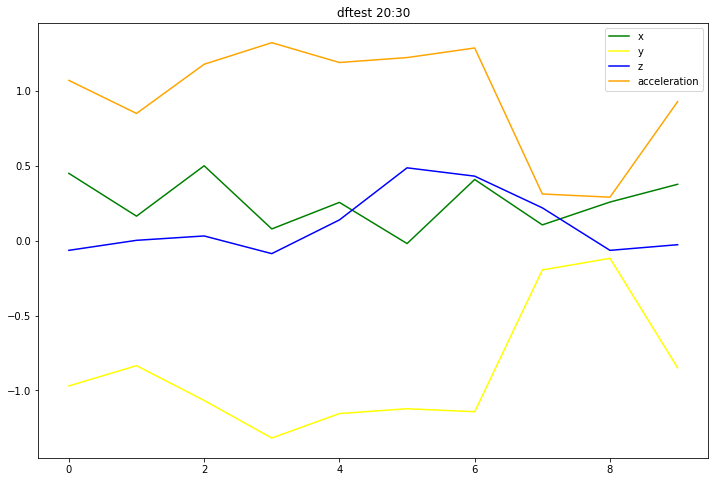

In [279]:
start = 20
end = 30
plt.figure(figsize=(12,8))
#plt.plot(range(10),movelet_dict.x[9], color = 'grey')
#plt.plot(range(10),movelet_dict.y[9], color = 'yellow')
plt.plot(range(10),dftest[start:end].x, color = 'green')
plt.plot(range(10),dftest[start:end].y, color = 'yellow')
plt.plot(range(10),dftest[start:end].z, color = 'blue')
plt.plot(range(10),dftest[start:end].acceleration, color = 'orange')
#plt.plot(range(10),x_testx, color = 'black')
#plt.plot(range(10),X_test['z'].reset_index(drop = True) , color = 'blue')
#plt.plot(range(10),X_test['acceleration'].reset_index(drop = True) , color = 'red')
#plt.plot(range(10),movelet_dict.acceleration[9].reset_index(drop = True) , color = 'red')
plt.title('dftest 20:30')
#plt.plot(df_label4_1.timestamp,df_label4_1.acceleration)
plt.legend()
plt.show()

In [230]:
dftest[0:10]

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label,acceleration
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623,NaN,NaN,NaN,1.513079
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975,NaN,NaN,NaN,1.116668
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771,NaN,NaN,NaN,1.019736
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810,NaN,NaN,NaN,0.827910
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550,NaN,NaN,NaN,0.310324
5,24335,1565110306640,2019-08-06T16:51:46.640,unknown,0.583969,-0.513306,0.924362,NaN,NaN,NaN,1.207869
6,24336,1565110306740,2019-08-06T16:51:46.740,unknown,-0.058807,-0.752899,0.238098,NaN,NaN,NaN,0.791837
7,24337,1565110306841,2019-08-06T16:51:46.841,unknown,0.463318,-1.152679,0.013855,NaN,NaN,NaN,1.242387
8,24338,1565110306941,2019-08-06T16:51:46.941,unknown,0.397049,-0.891922,0.000656,NaN,NaN,NaN,0.976306
9,24339,1565110307041,2019-08-06T16:51:47.041,unknown,0.098282,-0.833771,0.118042,24339.0,2019-08-06T16:51:47.041,NaN,0.847801


In [271]:
import time
start_time = time.time()
label_pred = label_prediction_improved(dftest[['x','y','z','acceleration']][0:10],movelet_dict)
print ("My program took", time.time() - start_time, "to run")

My program took 0.3849947452545166 to run


In [272]:
label_pred

(139, 3)

In [256]:
start_time = time.time()
labels = []
k = 0
l= 10
for each in range(125):
    label = label_prediction_improved(dftest[['x','y','z','acceleration']][k:l],movelet_dict)
    labels.append(label[1])
    k+=10
    l+=10
print ("My program took", time.time() - start_time, "to run")

My program took 42.660212993621826 to run


In [257]:
len(labels)

125

In [273]:
list(labels)

[3,
 4,
 4,
 4,
 3,
 1,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 2,
 1,
 2,
 4,
 4,
 2,
 4,
 3,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 2,
 3,
 2,
 2,
 2,
 2,
 4,
 4,
 2]

In [253]:
dftest.shape

(1250, 11)

In [254]:
dftest.head()

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label,acceleration
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623,NaN,NaN,NaN,1.513079
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975,NaN,NaN,NaN,1.116668
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771,NaN,NaN,NaN,1.019736
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810,NaN,NaN,NaN,0.827910
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550,NaN,NaN,NaN,0.310324


In [269]:
dftestl ['label']= labels 

In [270]:
dftestl

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,3
1,24349,1565110308043,2019-08-06T16:51:48.043,4
2,24359,1565110309046,2019-08-06T16:51:49.046,4
3,24369,1565110310048,2019-08-06T16:51:50.048,4
4,24379,1565110311050,2019-08-06T16:51:51.050,3
5,24389,1565110312045,2019-08-06T16:51:52.045,1
6,24399,1565110313047,2019-08-06T16:51:53.047,4
7,24409,1565110314049,2019-08-06T16:51:54.049,2
8,24419,1565110315051,2019-08-06T16:51:55.051,4
9,24429,1565110316054,2019-08-06T16:51:56.054,4


In [274]:
labels_list = [3,4,4,4,3,1,4,2,4,4,4,4,4,1,4,3,4,4,3,4,3,2,1,2,4,4,2,4,3,4,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,4,3,3,3,3,3,3,3,1,3,3,3,4,3,3,3,4,3,4,3,3,3,3,3,3,2,4,2,3,3,3,2,3,3,2,2,2,2,3,4,2,2,2,4,4,4,4,2,4,4,4,4,4,2,4,4,4,4,3,3,4,2,3,2,2,2,2,4,4,2
        ]

In [275]:
len(labels_list)

125

In [281]:
#Con esta estrategia accuracy en la prediccion de las incognitas fue 55%.... tengo que mejorar el algoritmo, pero
#eso voy a probar de nuevo con el dfsmall 

In [282]:
labels = label_prediction_improved(X_test_small,movelet_dict_small )

In [283]:
labels

(18, 4)

In [284]:
dfsmall[['x','y','z','acceleration','label']][123:125]

,x,y,z,acceleration,label
123,-0.012024,-1.522202,0.387268,1.570738,4
124,0.100693,-0.773788,-0.013916,0.780437,4


In [285]:
dfsmall

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label,acceleration
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1,0.991568
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1,0.852482
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1,1.018969
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1,1.251372
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1,1.005171
5,20639,1565109936099,2019-08-06T16:45:36.099,unknown,0.037582,-0.998383,0.019333,20639,2019-08-06T16:45:36.099,1,0.999277
6,20649,1565109937101,2019-08-06T16:45:37.101,unknown,-0.020554,-0.999741,0.120789,20649,2019-08-06T16:45:37.101,1,1.007221
7,20659,1565109938103,2019-08-06T16:45:38.103,unknown,0.032440,-0.970337,0.241425,20659,2019-08-06T16:45:38.103,1,1.000446
8,20669,1565109939106,2019-08-06T16:45:39.106,unknown,0.212524,-0.976364,0.074997,20669,2019-08-06T16:45:39.106,1,1.002037
9,20679,1565109940108,2019-08-06T16:45:40.108,unknown,0.154510,-0.843460,0.010544,20679,2019-08-06T16:45:40.108,2,0.857560


In [309]:
labels = label_prediction_improved(dfsmall[['x','y','z','acceleration','label']][0:2],movelet_dict_small )

In [310]:
labels

(2, 1)

In [324]:
#avanzando de a uno en los moveletes de la muestra incognita
label_small_predicted = []
o = 0
for i in range (375):
    l = label_prediction_improved(dfsmall[['x','y','z','acceleration','label']][o:o+2],movelet_dict_small)
    label_small_predicted.append(l[1])
    o = o + 1


In [325]:
len(label_small_predicted)

375

In [327]:
dfsmall['label_predicted'] = label_small_predicted

In [334]:
dfsmall.head(30)

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label,acceleration,label_predicted
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,20589,2019-08-06T16:45:31.087,1,0.991568,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,20599,2019-08-06T16:45:32.090,1,0.852482,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,20609,2019-08-06T16:45:33.092,1,1.018969,2
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,20619,2019-08-06T16:45:34.094,1,1.251372,2
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,20629,2019-08-06T16:45:35.097,1,1.005171,1
5,20639,1565109936099,2019-08-06T16:45:36.099,unknown,0.037582,-0.998383,0.019333,20639,2019-08-06T16:45:36.099,1,0.999277,1
6,20649,1565109937101,2019-08-06T16:45:37.101,unknown,-0.020554,-0.999741,0.120789,20649,2019-08-06T16:45:37.101,1,1.007221,1
7,20659,1565109938103,2019-08-06T16:45:38.103,unknown,0.032440,-0.970337,0.241425,20659,2019-08-06T16:45:38.103,1,1.000446,1
8,20669,1565109939106,2019-08-06T16:45:39.106,unknown,0.212524,-0.976364,0.074997,20669,2019-08-06T16:45:39.106,1,1.002037,1
9,20679,1565109940108,2019-08-06T16:45:40.108,unknown,0.154510,-0.843460,0.010544,20679,2019-08-06T16:45:40.108,2,0.857560,3


In [331]:
#accuracy determination
acc = (np.sum(dfsmall['label']==dfsmall['label_predicted']))/dfsmall.shape[0]

In [332]:
acc

0.38133333333333336

In [335]:
#vamos a correr la prediccion sobre el df3 avanzando de a 1

In [346]:
start_time = time.time()
labels_df3 = []
k = 0

for each in range(df3.shape[0]):
    lb = label_prediction_improved(df3[['x','y','z','acceleration']][k:k+10],movelet_dict)
    labels_df3.append(lb[1])
    k+=1
    
print ("My program took", time.time() - start_time, "to run")

My program took 1200.767837047577 to run


In [347]:
df3['predicted_label'] = labels_df3

In [348]:
acc = (np.sum(df3['label']==df3['predicted_label']))/df3.shape[0]

In [349]:
acc

0.4770021645021645

In [351]:
df3[300:350]

,timestamp,x,y,z,label,acceleration,predicted_label
312,1565109962058,-0.249741,-0.268509,-0.010849,2.0,0.366858,4
313,1565109962158,0.069595,-0.640488,0.262390,2.0,0.695641,4
314,1565109962259,0.195938,0.122009,0.240692,2.0,0.333483,4
315,1565109962359,0.596481,-0.520966,1.367126,2.0,1.579946,4
316,1565109962459,0.248032,-1.569397,-0.045395,2.0,1.589524,2
317,1565109962559,0.001007,-0.724701,-0.026840,2.0,0.725198,2
318,1565109962660,0.099838,-0.920609,0.003586,2.0,0.926013,2
319,1565109962760,0.750198,-0.979492,-0.436172,2.0,1.308606,2
320,1565109962860,0.177902,-1.290955,-0.095901,2.0,1.306679,4
321,1565109962960,0.217148,-1.345566,0.269821,2.0,1.389426,4


In [343]:
lb = label_prediction_improved(df3[['x','y','z','acceleration']][3:13],movelet_dict)

In [344]:
lb

(1, 1)

In [345]:
labels_df3

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [ ]:
#sospecho que estoy chingando el empalme con la tabla que trae labels....tengo que retom